## Fast Food Habit Analysis
#Authors: Ololade Shokan and Mbafan Samantha Lyam.
**Aim**:To develop a machine learning model which predicts the preferred mode of contact and/or favourite fast food order. 

In [1]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


## Read Dataset

In [2]:
# Read data path

food = pd.read_csv('drive/My Drive/Fast Food Habit/FastFood_Habits_Questionnaire.csv')
food.head()

,Timestamp,What age group do you fall under?,Which is your gender?,What would you say accurately matches your personality in a group discussion?,Choose all the options that are close to where you reside.,How often do you eat from fast foods each month?,What does your purchase mostly consist of? [Nigerian dishes],What does your purchase mostly consist of? [Burger],What does your purchase mostly consist of? [Pizza],What does your purchase mostly consist of? [Small chops],...,"When it comes to ordering, which do you prefer the most?",What is the best way to reach you for special offers/Discounts?,What about a fast food restaurant endears you to them? [Their special offers],What about a fast food restaurant endears you to them? [The quality],What about a fast food restaurant endears you to them? [Value for your money],What about a fast food restaurant endears you to them? [Excellent service],What about a fast food restaurant endears you to them? [Convenience],What about a fast food restaurant endears you to them? [Price],What about a fast food restaurant endears you to them? [Social media savviness],What do you consider yourself to be the most?
0,2018/09/07 4:16:15 PM GMT+1,25 - 34,Male,I am original and a nonconformist ( My opinion...,Victoria Island;Ikoyi,More than 10,Most likely,Most likely,Likely,Highly Unlikely,...,Order online and get delivered,Via Emails,Indifferent,Agree,Strongly Agree,Agree,Strongly Agree,Agree,Agree,A Shawarma Expert
1,2018/09/07 4:32:02 PM GMT+1,25 - 34,Male,I am original and a nonconformist ( My opinion...,Lekki Phase 1,7 - 10,Highly Unlikely,Likely,Likely,Most likely,...,Order in a physical store and takeaway,Via SMS,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Indifferent,A Jollof Warrior
2,2018/09/07 5:12:57 PM GMT+1,25 - 34,Male,"Passionate, I sometimes over talk.",Victoria Island;Ikoyi;Lekki Phase 1;Gbagada,4 - 6,Likely,Highly Unlikely,Most likely,Likely,...,Order online and pick up,Via SMS,Agree,Agree,Strongly Agree,Strongly Agree,Stongly Disagrre,Agree,Agree,A Jollof Warrior
3,2018/09/07 5:39:48 PM GMT+1,18 - 25,Female,"Passionate, I sometimes over talk.",Lekki Phase 1,4 - 6,Most likely,Likely,Most likely,Likely,...,Order online and get delivered;Order online an...,Via SMS,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Indifferent,Strongly Agree,Indifferent,A Pizza Connoisseur
4,2018/09/07 5:59:52 PM GMT+1,25 - 34,Female,"Passionate, I sometimes over talk.",Gbagada,4 - 6,Most likely,Highly Unlikely,Highly Unlikely,Likely,...,Order online and get delivered;Order in a phys...,In-stores,Indifferent,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Indifferent,Small chops Supremacist


In [ ]:
# check the columns
food.columns 

Index(['Timestamp', 'What age group do you fall under?',
       'Which is your gender?',
       'What would you say accurately matches your personality in a group discussion?',
       'Choose all the options that are close to where you reside.',
       'How often do you eat from fast foods each month?',
       'What does your purchase mostly consist of?  [Nigerian dishes]',
       'What does your purchase mostly consist of?  [Burger]',
       'What does your purchase mostly consist of?  [Pizza]',
       'What does your purchase mostly consist of?  [Small chops]',
       'What does your purchase mostly consist of?  [Shawarma]',
       'What do you look for when choosing a fast food restaurant?',
       'Which of the following have you been to at least twice in the last 2 months',
       'When it comes to ordering, which do you prefer the most?',
       'What is the best way to reach you for special offers/Discounts?',
       'What about a fast food restaurant endears you to them? [Their

In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 23 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   Timestamp                                                                        441 non-null    object
 1   What age group do you fall under?                                                441 non-null    object
 2   Which is your gender?                                                            441 non-null    object
 3   What would you say accurately matches your personality in a group discussion?    440 non-null    object
 4   Choose all the options that are close to where you reside.                       421 non-null    object
 5   How often do you eat from fast foods each month?                                 441 non-null    object
 6   What does your pur

## Data Cleaning

In [ ]:
# Renaming the headers

food.rename(columns={'Timestamp': 'Date',
                   'What age group do you fall under?': 'Age',
                   'Which is your gender?': 'Gender',
                   'What would you say accurately matches your personality in a group discussion?': 'Personality',
                   'Choose all the options that are close to where you reside.': 'Place_of_Residence',
                   'How often do you eat from fast foods each month?': 'No_of_times',
                   'What does your purchase mostly consist of?  [Nigerian dishes]': 'Purchase_Nigerian_dishes',
                   'What does your purchase mostly consist of?  [Burger]' : 'Purchase_Burger',
                   'What does your purchase mostly consist of?  [Pizza]': 'Purchase_Pizza',
                   'What does your purchase mostly consist of?  [Small chops]': 'Purchase_Small_Chops',
                   'What does your purchase mostly consist of?  [Shawarma]': 'Purchase_Shawarma',
                   'What do you look for when choosing a fast food restaurant?': 'FFR_Preference',
                   'Which of the following have you been to at least twice in the last 2 months': 'Preference_L2months',
                   'When it comes to ordering, which do you prefer the most?': 'Favourite_Order',
                   'What is the best way to reach you for special offers/Discounts?': 'Preferred_contact',
                   'What about a fast food restaurant endears you to them? [Their special offers]': 'Special_Offers',
                   'What about a fast food restaurant endears you to them? [The quality]': 'Quality',
                   'What about a fast food restaurant endears you to them? [Value for your money]': 'Services',
                   'What about a fast food restaurant endears you to them? [Excellent service]': 'Excellent_Services',
                   'What about a fast food restaurant endears you to them? [Convenience]': 'Convenience',
                   'What about a fast food restaurant endears you to them? [Price]': 'Price',
                   'What about a fast food restaurant endears you to them? [Social media savviness]': 'Social_MS',
                   'What do you consider yourself to be the most?' : 'FF_Avatar'}, inplace = True)
food.head(1)

,Date,Age,Gender,Personality,Place_of_Residence,No_of_times,Purchase_Nigerian_dishes,Purchase_Burger,Purchase_Pizza,Purchase_Small_Chops,...,Favourite_Order,Preferred_contact,Special_Offers,Quality,Services,Excellent_Services,Convenience,Price,Social_MS,FF_Avatar
0,2018/09/07 4:16:15 PM GMT+1,25 - 34,Male,I am original and a nonconformist ( My opinion...,Victoria Island;Ikoyi,More than 10,Most likely,Most likely,Likely,Highly Unlikely,...,Order online and get delivered,Via Emails,Indifferent,Agree,Strongly Agree,Agree,Strongly Agree,Agree,Agree,A Shawarma Expert


In [ ]:
# Define fuction for trimming 
def _clean_string(x):
  return x.strip()
food['Preferred_contact']= food['Preferred_contact'].apply(_clean_string).values


In [ ]:
# Replace values 
#df.replace(regex={r'^ba.$': 'new', 'foo': 'xyz'})
food['Purchase_Nigerian_dishes'].replace(regex={'Highly Unlikely':0, 'Likely':1,'Most likely':2 }, inplace = True)
food['Purchase_Burger'].replace(regex={'Highly Unlikely':0, 'Likely':1,'Most likely':2 }, inplace = True)
food['Purchase_Pizza'].replace(regex={'Highly Unlikely':0, 'Likely':1,'Most likely':2 }, inplace = True)
food['Purchase_Small_Chops'].replace(regex={'Highly Unlikely':0, 'Likely':1,'Most likely':2 }, inplace = True)
food['Purchase_Shawarma'].replace(regex={'Highly Unlikely':0, 'Likely':1,'Most likely':2 }, inplace = True)

In [ ]:
#food['Preferred_contact'].replace(to_replace=["Social media platforms","Through social media","Instagram"], value="Social_Media", inplace = True)
food['Preferred_contact'].replace(to_replace=["Social media platforms","Through social media","Instagram","An app belonging to the restaurant", 'In-stores','SocialMedia','Social_Media', 'Social Media',
       'Social media', 'Online ads'],value="Via Emails", inplace = True)
#food['Preferred_contact'].replace(to_replace=['Social media','Through social media ','Online ads','Social media','Social_Media', 'Social Media'],value="SocialMedia", inplace = True)

In [ ]:
food['Preferred_contact'].unique()

array(['Via Emails', 'Via SMS'], dtype=object)

In [ ]:
# Check missing values 

food.isnull().sum()

Date                         0
Age                          0
Gender                       0
Personality                  1
Place_of_Residence          20
No_of_times                  0
Purchase_Nigerian_dishes     0
Purchase_Burger              0
Purchase_Pizza               0
Purchase_Small_Chops         0
Purchase_Shawarma            0
FFR_Preference               0
Preference_L2months          0
Favourite_Order              0
Preferred_contact            0
Special_Offers               0
Quality                      0
Services                     0
Excellent_Services           0
Convenience                  0
Price                        0
Social_MS                    0
FF_Avatar                    0
dtype: int64

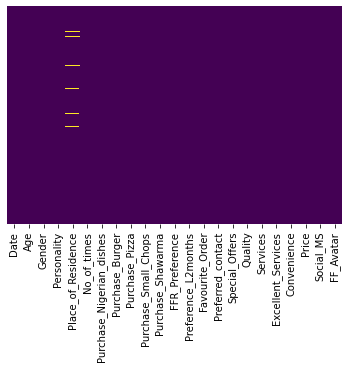

In [ ]:
sns.heatmap(food.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
food.ffill(axis = 0, inplace= True)

In [ ]:
# value count for age 
food['Age'].value_counts()

18 - 24    199
25 - 34    198
35 - 39     22
40+         13
18 - 25      7
16           1
21           1
Name: Age, dtype: int64

In [ ]:
# Replace age and print in dataframe
food['Age'].replace(to_replace=["18 - 25",'21'],
             value="18 - 24", inplace = True)
grouped = food.groupby('Age')
pd.DataFrame(grouped['Gender'].value_counts())

Gender
Age     Gender        
16      Female       1
18 - 24 Female     147
        Male        60
25 - 34 Female     109
        Male        89
35 - 39 Female      12
        Male        10
40+     Male         9
        Female       4

In [ ]:
# Replace No_of_times and print in dataframe
food['No_of_times'].replace(to_replace=["More than 10"],
             value="> 10", inplace = True)
pd.DataFrame(food['No_of_times'].value_counts())

,No_of_times
4 - 6,127
2 - 3,120
> 10,83
7 - 10,66
0 - 1,45


In [ ]:
food['Place_of_Residence'].replace(to_replace=["Victoria Island;Ikoyi;Lekki Phase 1", "Lekki Phase 1;Gbagada", "Ikoyi;Lekki Phase 1","Victoria Island;Lekki Phase 1", "Victoria Island;Magodo;Ikoyi;Lekki Phase 1"],  
             value="Lekki Phase 1", inplace = True)
food['Place_of_Residence'].replace(to_replace=["Victoria Island;Ikoyi;Gbagada", "Victoria Island;Ikoyi", "Victoria Island;Ikoyi;Lekki Phase 1;Gbagada", "Ikoyi;Gbagada"],  
             value="Ikoyi", inplace = True)
food['Place_of_Residence'].replace(to_replace=["Magodo;Gbagada","Victoria Island;Magodo;Ikoyi;Lekki Phase 1;Gbagada","Magodo;Lekki Phase 1;Gbagada","Magodo;Ikoyi", "Magodo;Ikoyi;Gbagada","Magodo;Lekki Phase 1"],  
             value="Magodo", inplace = True)
food['Place_of_Residence'].replace(to_replace=["Victoria Island;Magodo;Lekki Phase 1;Gbagada","Victoria Island;Magodo;Gbagada", "Victoria Island;Magodo;Ikoyi;Gbagada", "Victoria Island;Gbagada", "Gbagada" ],  
             value="Gbagada ", inplace = True)

In [ ]:
# define funtion to trim 
def _clean_string(x):
  return x.strip()
food['Favourite_Order']= food['Favourite_Order'].apply(_clean_string).values

In [ ]:
# Grouped Favourite_Order values 
food['Favourite_Order'].replace(to_replace=["Order in a physical store and dine in","Order in a physical store and dine in;Order in a physical store and takeaway","Order in a physical store and dine in;Order online and pick up;Order in a physical store and takeaway",
                                            "Order in a physical store and dine in;Order online and pick up"],  
             value="In_store", inplace = True)

food['Favourite_Order'].replace(to_replace=["Order online and get delivered","Order online and get delivered;Order in a physical store and takeaway","Order online and get delivered;Order in a physical store and dine in","Order online and get delivered;Order in a physical store and dine in",
                                            "Order online and get delivered;Order online and pick up","Order online and get delivered;Order online and pick up;Order in a physical store and takeaway" ],  
             value="order_online", inplace = True)
food['Favourite_Order'].replace(to_replace=["Order in a physical store and takeaway","Order online and pick up","Order online and get delivered;Order in a physical store and dine in;Order online and pick up;Order in a physical store and takeaway",
                                            "Order online and pick up;Order in a physical store and takeaway","Order online and get delivered;Order in a physical store and dine in;Order in a physical store and takeaway" ],  
             value="Takeaway", inplace = True)


## Exploratory Data Analysis

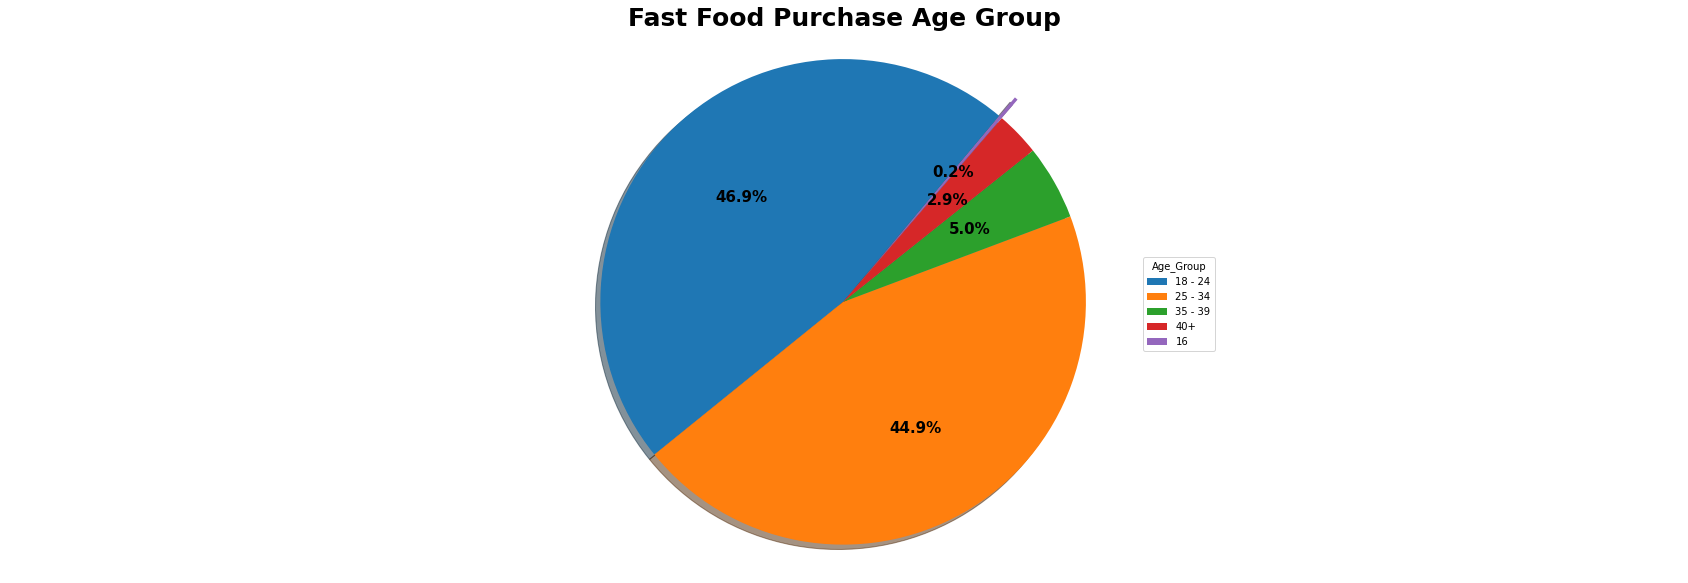

<Figure size 432x288 with 0 Axes>

In [ ]:
fig1, ax1 = plt.subplots(figsize=(30, 10), sharey=True)
Age_Group = ['18 - 24','25 - 34', '35 - 39', '40+','16']
wedges, texts, autotexts =ax1.pie(food['Age'].value_counts(),explode = (0, 0, 0, 0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=50)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.legend(wedges, Age_Group,
          title="Age_Group",
          loc="center",
          bbox_to_anchor=(0.45, 0.5, 0.5, 0))
plt.setp(autotexts, size=15, weight="bold")
ax1.set_title("Fast Food Purchase Age Group",size=25, weight="bold")
plt.show()
plt.savefig('drive/My Drive/Fast Food Habit/Age_Group.jpeg')

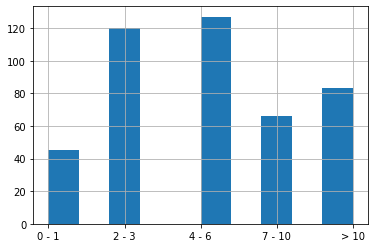

In [ ]:
# Check the distribution of No_of_times
food.sort_values('No_of_times', inplace=True)
food['No_of_times'].hist(bins =10)

Text(0.5, 0, 'Age')

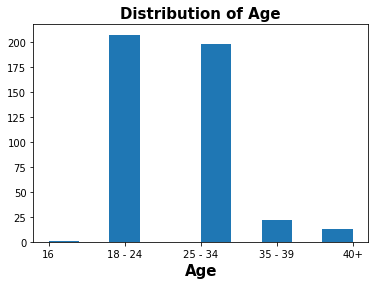

In [ ]:
# Check the distribution of Age
food.sort_values('Age', inplace=True)
plt.hist(food['Age'])
plt.title('Distribution of Age',size=15, weight="bold");
plt.xlabel('Age',size=15, weight="bold")

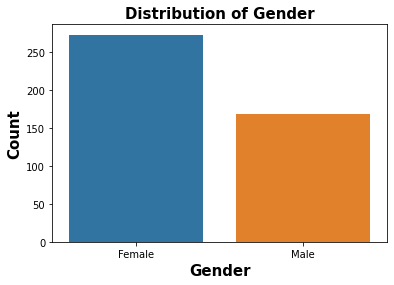

In [ ]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='Gender', data=food);
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2)
plt.title('Distribution of Gender', size=15, weight="bold");
plt.xlabel('Gender',size=15, weight="bold")
plt.ylabel('Count',size=15, weight="bold")
plt.savefig('drive/My Drive/Fast Food Habit/Gender_dist.jpeg')

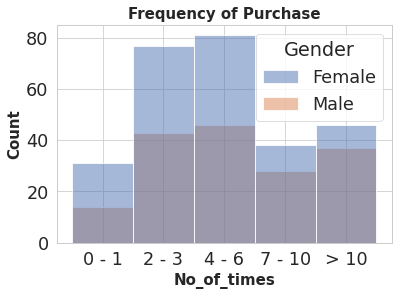

In [ ]:
# check 'No_of_times' grouped by Gender
food.sort_values('No_of_times', inplace=True)
sns.histplot(food, x = 'No_of_times', hue = 'Gender')
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2)
plt.title('Frequency of Purchase', size=15, weight="bold");
plt.xlabel('No_of_times',size=15, weight="bold")
plt.ylabel('Count',size=15, weight="bold")
plt.savefig('drive/My Drive/Fast Food Habit/No_of_times.jpeg')

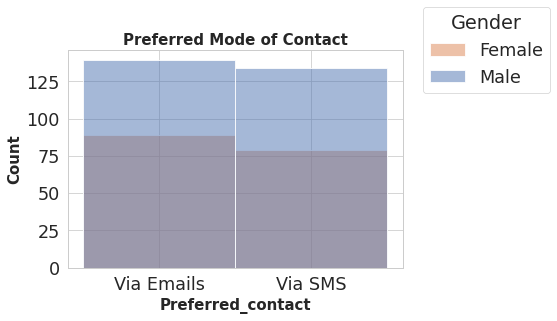

In [ ]:
# check Preferred_contact grouped by Gender
Gender = ['Female', 'Male']
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2) 
#sns.set(rc={"figure.figsize":(5, 5)})
sns.histplot(food, x = 'Preferred_contact', hue = 'Gender')
plt.title('Preferred Mode of Contact', size=15, weight="bold");
plt.xlabel('Preferred_contact',size=15, weight="bold")
plt.ylabel('Count',size=15, weight="bold")
plt.legend(Gender,
           title="Gender",
          loc="center",
          bbox_to_anchor=(1, 1, 0.5, 0))
plt.savefig('drive/My Drive/Fast Food Habit/Preferred_contact.jpeg')

In [ ]:
print(food["Purchase_Nigerian_dishes"].unique())
print(food["Purchase_Burger"].unique())
print(food["Purchase_Pizza"].unique())
print(food["Purchase_Small_Chops"].unique())
print(food["Purchase_Shawarma"].unique())

[2 1 0]
[0 2 1]
[1 0 2]
[0 2 1]
[2 0 1]


In [ ]:
print(food["Special_Offers"].unique())
print(food["Quality"].unique())
print(food["Services"].unique())
print(food["Excellent_Services"].unique())
print(food["Convenience"].unique())
print(food["Price"].unique())
print(food["Social_MS"].unique())

['Strongly Agree' 'Indifferent' 'Agree' 'Stongly Disagrre']
['Strongly Agree' 'Agree' 'Indifferent' 'Stongly Disagrre']
['Strongly Agree' 'Indifferent' 'Agree' 'Stongly Disagrre']
['Strongly Agree' 'Agree' 'Indifferent' 'Stongly Disagrre']
['Strongly Agree' 'Agree' 'Indifferent' 'Stongly Disagrre']
['Strongly Agree' 'Indifferent' 'Agree' 'Stongly Disagrre']
['Strongly Agree' 'Agree' 'Indifferent' 'Stongly Disagrre']


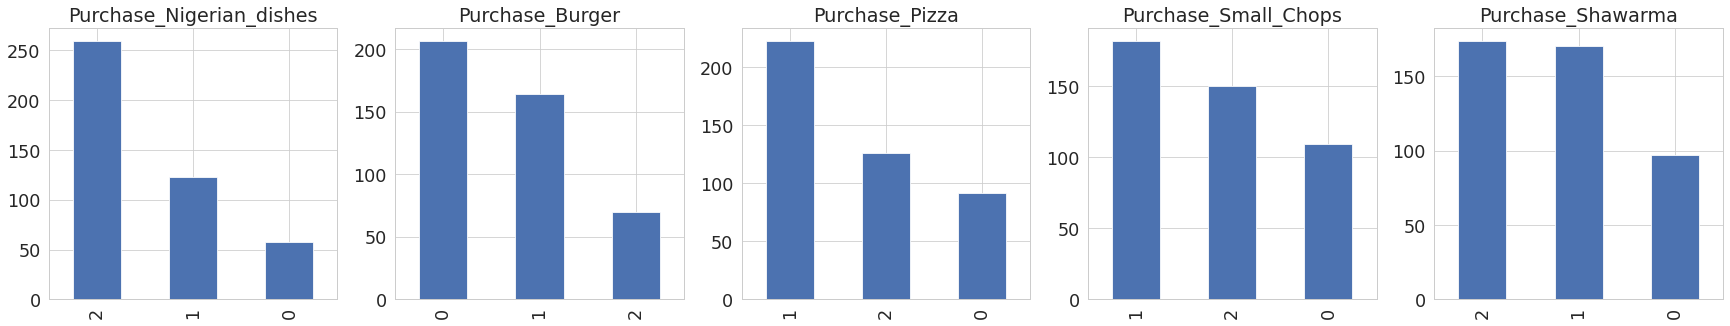

In [ ]:
# Visualize the purchase preferences 
categorical_features = ['Purchase_Nigerian_dishes', 'Purchase_Burger','Purchase_Pizza', 'Purchase_Small_Chops', 'Purchase_Shawarma']
fig, ax = plt.subplots(1, len(categorical_features), figsize=(30, 5))
for i, categorical_feature in enumerate(food[categorical_features]):
    food[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

Text(0.5, 1.0, 'Purchase_Shawarma')

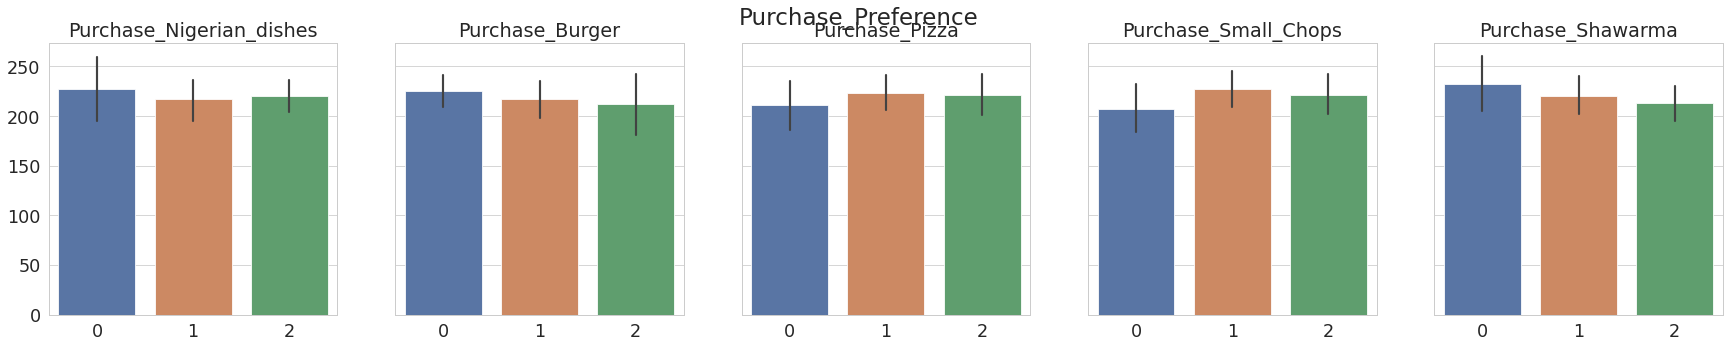

In [ ]:
# Visualize the purchase preferences 
fig, axes = plt.subplots(1, 5, figsize=(30, 5), sharey=True)
fig.suptitle('Purchase_Preference')

# Nigerian_dishes
sns.barplot(ax=axes[0], x=food['Purchase_Nigerian_dishes'].values, y=food['Purchase_Nigerian_dishes'].index)
axes[0].set_title(food['Purchase_Nigerian_dishes'].name)

# Burger
sns.barplot(ax=axes[1], x=food['Purchase_Burger'].values, y=food['Purchase_Burger'].index)
axes[1].set_title(food['Purchase_Burger'].name)

# Pizza
sns.barplot(ax=axes[2], x=food['Purchase_Pizza'].values, y=food['Purchase_Pizza'].index)
axes[2].set_title(food['Purchase_Pizza'].name)

#Small_Chops 
sns.barplot(ax=axes[3], x=food['Purchase_Small_Chops'].values, y=food['Purchase_Small_Chops'].index)
axes[3].set_title(food['Purchase_Small_Chops'].name)

# Shawarma
sns.barplot(ax=axes[4], x=food['Purchase_Shawarma'].values, y=food['Purchase_Shawarma'].index)
axes[4].set_title(food['Purchase_Shawarma'].name)

Text(0.5, 1.0, 'Purchase_Shawarma')

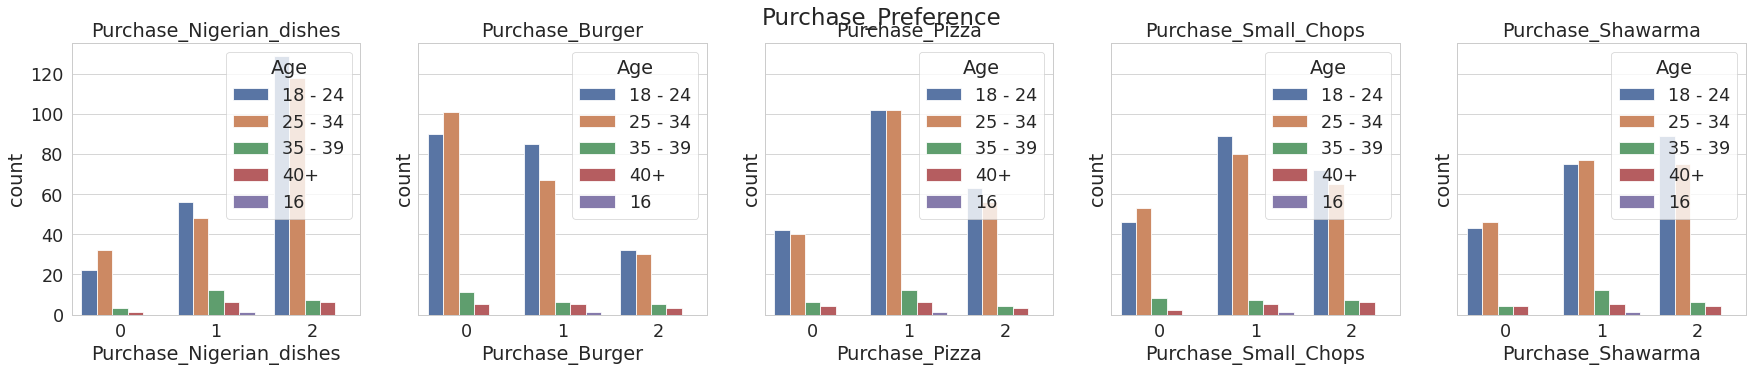

In [ ]:
# Visualize the purchase preferences with Age as hue
fig, axes = plt.subplots(1, 5, figsize=(30, 5), sharey=True)
fig.suptitle('Purchase_Preference')

# Nigerian_dishes
sns.countplot(ax=axes[0],data= food,x= 'Purchase_Nigerian_dishes',   hue= 'Age')
axes[0].set_title(food['Purchase_Nigerian_dishes'].name)

# Burger
sns.countplot(ax=axes[1],data= food,x= 'Purchase_Burger',   hue= 'Age')
axes[1].set_title(food['Purchase_Burger'].name)

# Pizza
sns.countplot(ax=axes[2], data= food,x= 'Purchase_Pizza',   hue= 'Age')
axes[2].set_title(food['Purchase_Pizza'].name)

#Small_Chops 
sns.countplot(ax=axes[3],data= food,x= 'Purchase_Small_Chops',   hue= 'Age' )
axes[3].set_title(food['Purchase_Small_Chops'].name)

# Shawarma
sns.countplot(ax=axes[4],data= food, x= 'Purchase_Shawarma', hue ='Age' )
axes[4].set_title(food['Purchase_Shawarma'].name)

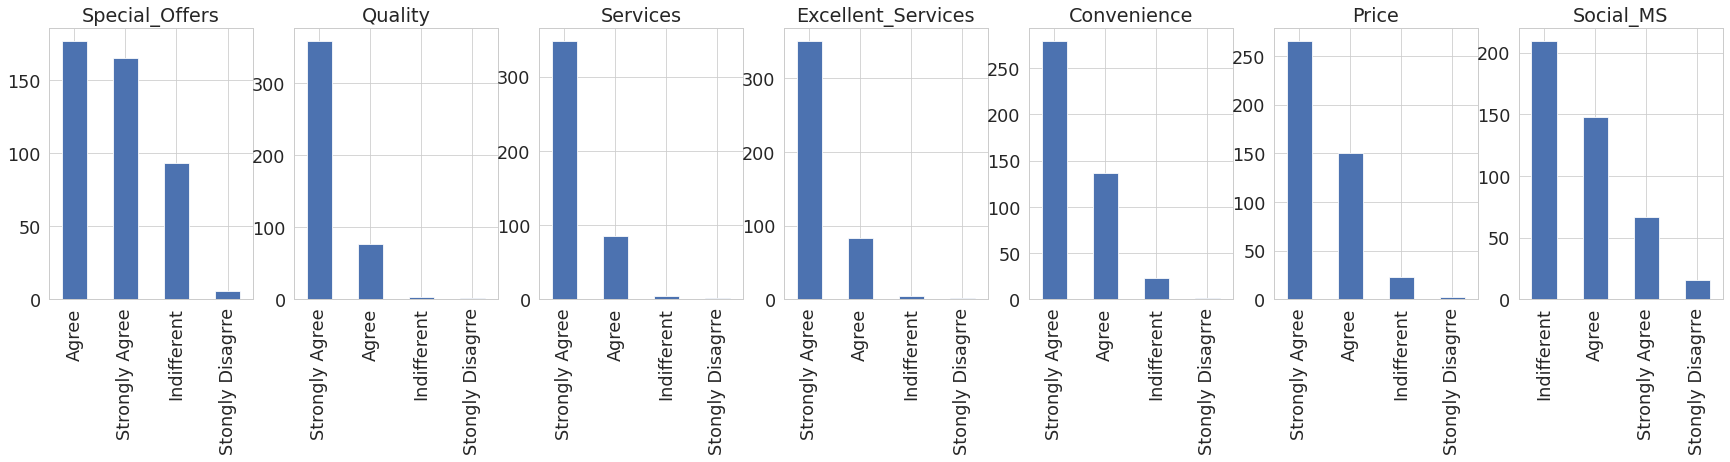

In [ ]:
# Visualize the desired qualities 
categorical_features = ['Special_Offers', 'Quality', 'Services',
       'Excellent_Services', 'Convenience', 'Price', 'Social_MS']
fig, ax = plt.subplots(1, len(categorical_features), figsize=(30, 5))
for i, categorical_feature in enumerate(food[categorical_features]):
    food[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

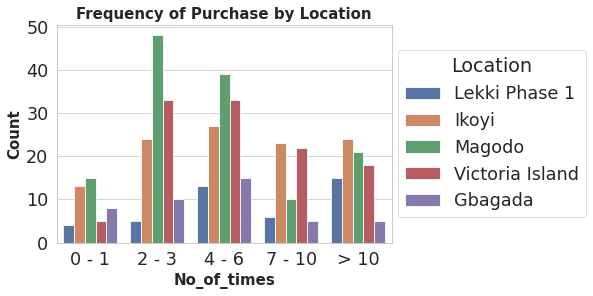

In [ ]:
# Check no of purchase at fast food restaurant by location
Location = ['Lekki Phase 1','Ikoyi','Magodo','Victoria Island','Gbagada']
food.sort_values('No_of_times', inplace=True)

sns.countplot(data= food,x= 'No_of_times',hue='Place_of_Residence')
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2) 
plt.title('Frequency of Purchase by Location', size=15, weight="bold");
plt.xlabel('No_of_times',size=15, weight="bold")
plt.ylabel('Count',size=15, weight="bold")
plt.legend(Location,
           title="Location",
          loc="center",
          bbox_to_anchor=(1.05, 0.5, 0.5, 0))
plt.savefig('drive/My Drive/Fast Food Habit/Frequency_Location.jpeg')


In [ ]:
food['Preferred_contact'].value_counts()

Via Emails    228
Via SMS       213
Name: Preferred_contact, dtype: int64

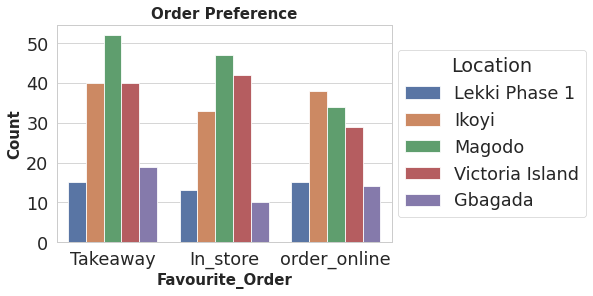

In [ ]:
# Order preference by location
Location = ['Lekki Phase 1','Ikoyi','Magodo','Victoria Island','Gbagada']
sns.countplot(data= food,x= 'Favourite_Order',hue='Place_of_Residence')
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2) 
plt.title('Order Preference', size=15, weight="bold");
plt.xlabel('Favourite_Order',size=15, weight="bold")
plt.ylabel('Count',size=15, weight="bold")
plt.legend(Location,
           title="Location",
          loc="center",
          bbox_to_anchor=(1.05, 0.5, 0.5, 0))
plt.savefig('drive/My Drive/Fast Food Habit/Orderperf_Location.jpeg')

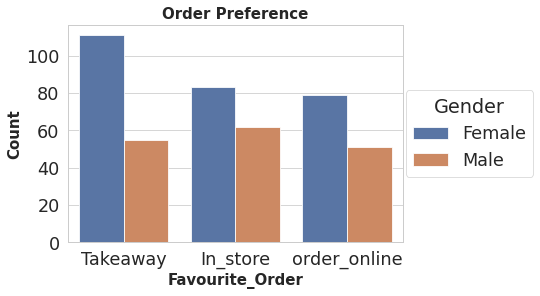

In [ ]:
# Order preference using Gender as hue 
Gender = ['Female', 'Male']
sns.countplot(data= food,x='Favourite_Order',hue='Gender')
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2) 
plt.title('Order Preference', size=15, weight="bold");
plt.xlabel('Favourite_Order',size=15, weight="bold")
plt.ylabel('Count',size=15, weight="bold")
plt.legend(Gender,
           title="Gender",
          loc="center",
          bbox_to_anchor=(0.95, 0.5, 0.5, 0))
plt.savefig('drive/My Drive/Fast Food Habit/Orderperf_gender.jpeg')

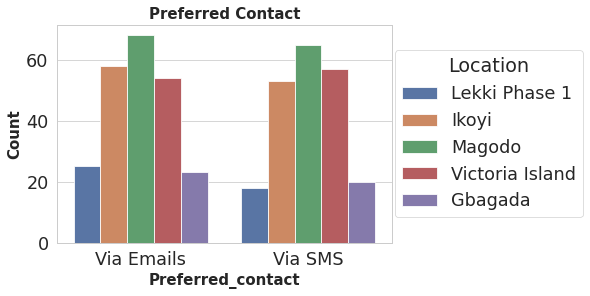

In [ ]:
# preferred contact using location as hue
Location = ['Lekki Phase 1','Ikoyi','Magodo','Victoria Island','Gbagada']
sns.countplot(data= food,x='Preferred_contact',hue='Place_of_Residence')
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=2) 
plt.title('Preferred Contact', size=15, weight="bold");
plt.xlabel('Preferred_contact',size=15, weight="bold")
plt.ylabel('Count',size=15, weight="bold")
plt.legend(Location,
           title="Location",
          loc="center",
          bbox_to_anchor=(1.04, 0.5, 0.5, 0))
plt.savefig('drive/My Drive/Fast Food Habit/Preferred_contact.jpeg')

Text(0.5, 1.0, 'Purchase_Shawarma')

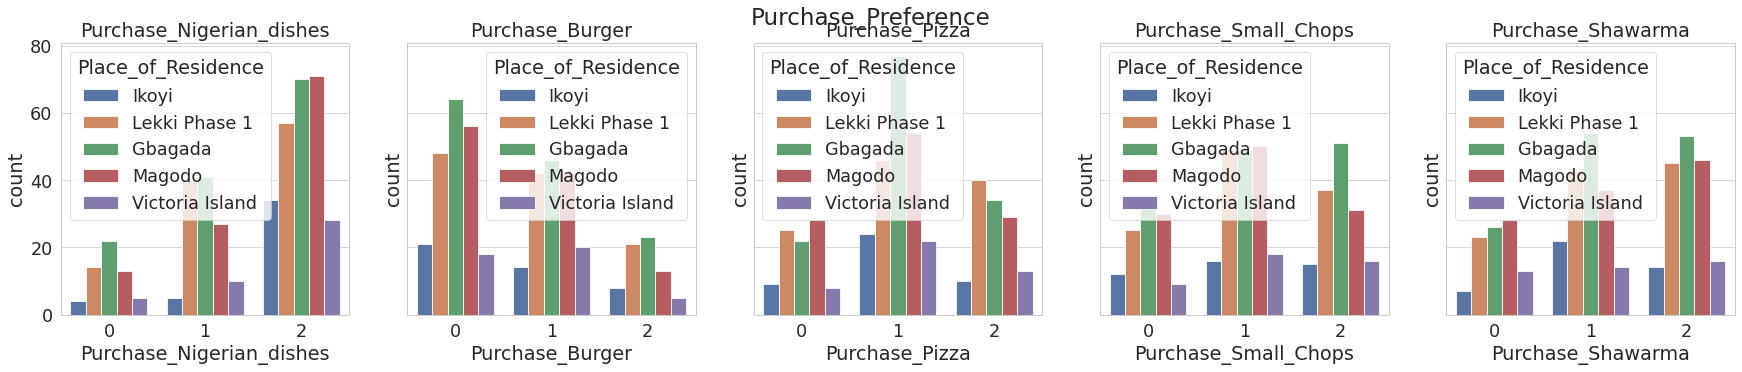

In [ ]:
# Order peferences by location 
fig, axes = plt.subplots(1, 5, figsize=(30, 5), sharey=True)
fig.suptitle('Purchase_Preference')

# Nigerian_dishes
sns.countplot(ax=axes[0],data= food,x= 'Purchase_Nigerian_dishes',   hue= 'Place_of_Residence')
axes[0].set_title(food['Purchase_Nigerian_dishes'].name)

# Burger
sns.countplot(ax=axes[1],data= food,x= 'Purchase_Burger',   hue= 'Place_of_Residence')
axes[1].set_title(food['Purchase_Burger'].name)

# Pizza
sns.countplot(ax=axes[2], data= food,x= 'Purchase_Pizza',   hue= 'Place_of_Residence')
axes[2].set_title(food['Purchase_Pizza'].name)

#Small_Chops 
sns.countplot(ax=axes[3],data= food,x= 'Purchase_Small_Chops',   hue= 'Place_of_Residence' )
axes[3].set_title(food['Purchase_Small_Chops'].name)

# Shawarma
sns.countplot(ax=axes[4],data= food, x= 'Purchase_Shawarma', hue ='Place_of_Residence' )
axes[4].set_title(food['Purchase_Shawarma'].name)

In [ ]:
#df.replace(regex={r'^ba.$': 'new', 'foo': 'xyz'})
food["Special_Offers"].replace(regex={'Indifferent':0, 'Strongly Agree':1,'Agree':2, 'Stongly Disagrre':3 }, inplace = True)
food["Quality"].replace(regex={'Indifferent':0, 'Strongly Agree':1,'Agree':2, 'Stongly Disagrre':3 }, inplace = True)
food["Services"].replace(regex={'Indifferent':0, 'Strongly Agree':1,'Agree':2, 'Stongly Disagrre':3 }, inplace = True)
food["Excellent_Services"].replace(regex={'Indifferent':0, 'Strongly Agree':1,'Agree':2, 'Stongly Disagrre':3 }, inplace = True)
food["Convenience"].replace(regex={'Indifferent':0, 'Strongly Agree':1,'Agree':2, 'Stongly Disagrre':3 }, inplace = True)
food["Price"].replace(regex={'Indifferent':0, 'Strongly Agree':1,'Agree':2, 'Stongly Disagrre':3 }, inplace = True)
food["Social_MS"].replace(regex={'Indifferent':0, 'Strongly Agree':1,'Agree':2, 'Stongly Disagrre':3 }, inplace = True)

Text(0.5, 1.0, 'Social_MS')

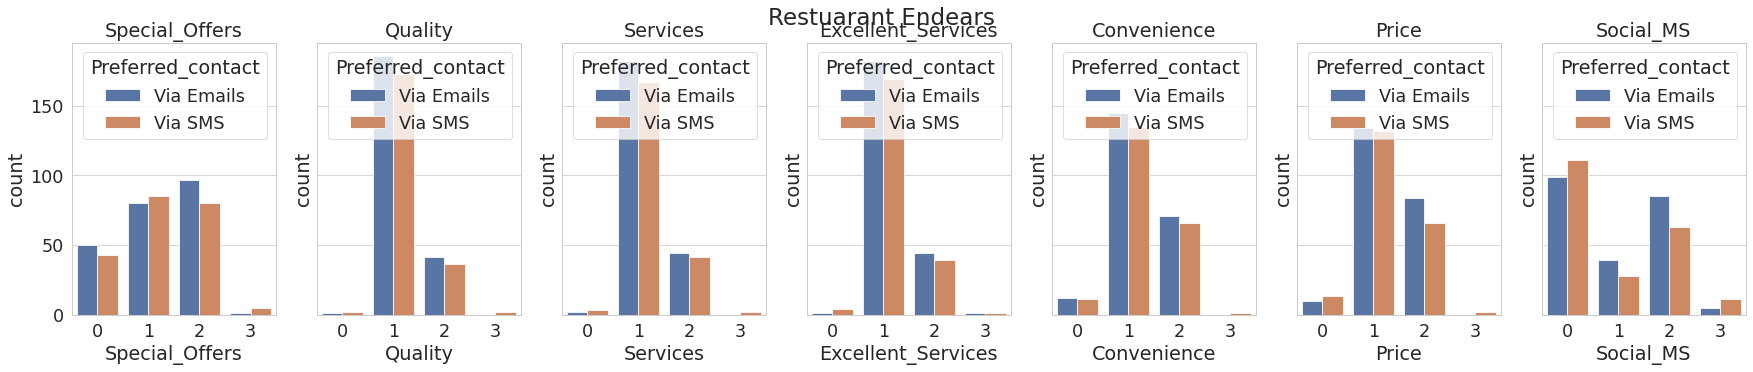

In [ ]:
# Desired Qualities by preferred contact
fig, axes = plt.subplots(1, 7, figsize=(30, 5), sharey=True)
fig.suptitle('Restuarant Endears\n\n')

# "Special_Offers"
sns.countplot(ax=axes[0],data= food,x= "Special_Offers",   hue= 'Preferred_contact')
axes[0].set_title(food["Special_Offers"].name)

# "Quality"
sns.countplot(ax=axes[1],data= food,x= "Quality",   hue= 'Preferred_contact')
axes[1].set_title(food["Quality"].name)

# "Services"
sns.countplot(ax=axes[2], data= food,x= "Services",   hue= 'Preferred_contact')
axes[2].set_title(food["Services"].name)

# "Excellent_Services"
sns.countplot(ax=axes[3],data= food,x= "Excellent_Services",   hue= 'Preferred_contact')
axes[3].set_title(food["Excellent_Services"].name)

# "Convenience"
sns.countplot(ax=axes[4],data= food, x= "Convenience", hue ='Preferred_contact')
axes[4].set_title(food["Convenience"].name)

# "Price"
sns.countplot(ax=axes[5],data= food,x= "Price",   hue= 'Preferred_contact')
axes[5].set_title(food["Price"].name)

# "Social_MS"
sns.countplot(ax=axes[6],data= food, x= "Social_MS", hue ='Preferred_contact')
axes[6].set_title(food["Social_MS"].name)

# Models

In [ ]:
food2 = pd.read_csv('drive/My Drive/Fast Food Habit/FastFood_Habits_Questionnaire.csv')
food2.head()

,Timestamp,What age group do you fall under?,Which is your gender?,What would you say accurately matches your personality in a group discussion?,Choose all the options that are close to where you reside.,How often do you eat from fast foods each month?,What does your purchase mostly consist of? [Nigerian dishes],What does your purchase mostly consist of? [Burger],What does your purchase mostly consist of? [Pizza],What does your purchase mostly consist of? [Small chops],...,"When it comes to ordering, which do you prefer the most?",What is the best way to reach you for special offers/Discounts?,What about a fast food restaurant endears you to them? [Their special offers],What about a fast food restaurant endears you to them? [The quality],What about a fast food restaurant endears you to them? [Value for your money],What about a fast food restaurant endears you to them? [Excellent service],What about a fast food restaurant endears you to them? [Convenience],What about a fast food restaurant endears you to them? [Price],What about a fast food restaurant endears you to them? [Social media savviness],What do you consider yourself to be the most?
0,2018/09/07 4:16:15 PM GMT+1,25 - 34,Male,I am original and a nonconformist ( My opinion...,Victoria Island;Ikoyi,More than 10,Most likely,Most likely,Likely,Highly Unlikely,...,Order online and get delivered,Via Emails,Indifferent,Agree,Strongly Agree,Agree,Strongly Agree,Agree,Agree,A Shawarma Expert
1,2018/09/07 4:32:02 PM GMT+1,25 - 34,Male,I am original and a nonconformist ( My opinion...,Lekki Phase 1,7 - 10,Highly Unlikely,Likely,Likely,Most likely,...,Order in a physical store and takeaway,Via SMS,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Indifferent,A Jollof Warrior
2,2018/09/07 5:12:57 PM GMT+1,25 - 34,Male,"Passionate, I sometimes over talk.",Victoria Island;Ikoyi;Lekki Phase 1;Gbagada,4 - 6,Likely,Highly Unlikely,Most likely,Likely,...,Order online and pick up,Via SMS,Agree,Agree,Strongly Agree,Strongly Agree,Stongly Disagrre,Agree,Agree,A Jollof Warrior
3,2018/09/07 5:39:48 PM GMT+1,18 - 25,Female,"Passionate, I sometimes over talk.",Lekki Phase 1,4 - 6,Most likely,Likely,Most likely,Likely,...,Order online and get delivered;Order online an...,Via SMS,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Indifferent,Strongly Agree,Indifferent,A Pizza Connoisseur
4,2018/09/07 5:59:52 PM GMT+1,25 - 34,Female,"Passionate, I sometimes over talk.",Gbagada,4 - 6,Most likely,Highly Unlikely,Highly Unlikely,Likely,...,Order online and get delivered;Order in a phys...,In-stores,Indifferent,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Indifferent,Small chops Supremacist


In [ ]:
# Renaming the headers

food2.rename(columns={'Timestamp': 'Date',
                   'What age group do you fall under?': 'Age',
                   'Which is your gender?': 'Gender',
                   'What would you say accurately matches your personality in a group discussion?': 'Personality',
                   'Choose all the options that are close to where you reside.': 'Place_of_Residence',
                   'How often do you eat from fast foods each month?': 'No_of_times',
                   'What does your purchase mostly consist of?  [Nigerian dishes]': 'Purchase_Nigerian_dishes',
                   'What does your purchase mostly consist of?  [Burger]' : 'Purchase_Burger',
                   'What does your purchase mostly consist of?  [Pizza]': 'Purchase_Pizza',
                   'What does your purchase mostly consist of?  [Small chops]': 'Purchase_Small_Chops',
                   'What does your purchase mostly consist of?  [Shawarma]': 'Purchase_Shawarma',
                   'What do you look for when choosing a fast food restaurant?': 'FFR_Preference',
                   'Which of the following have you been to at least twice in the last 2 months': 'Preference_L2months',
                   'When it comes to ordering, which do you prefer the most?': 'Favourite_Order',
                   'What is the best way to reach you for special offers/Discounts?': 'Preferred_contact',
                   'What about a fast food restaurant endears you to them? [Their special offers]': 'Special_Offers',
                   'What about a fast food restaurant endears you to them? [The quality]': 'Quality',
                   'What about a fast food restaurant endears you to them? [Value for your money]': 'Services',
                   'What about a fast food restaurant endears you to them? [Excellent service]': 'Excellent_Services',
                   'What about a fast food restaurant endears you to them? [Convenience]': 'Convenience',
                   'What about a fast food restaurant endears you to them? [Price]': 'Price',
                   'What about a fast food restaurant endears you to them? [Social media savviness]': 'Social_MS',
                   'What do you consider yourself to be the most?' : 'FF_Avatar'}, inplace = True)
food2.head(1)

,Date,Age,Gender,Personality,Place_of_Residence,No_of_times,Purchase_Nigerian_dishes,Purchase_Burger,Purchase_Pizza,Purchase_Small_Chops,...,Favourite_Order,Preferred_contact,Special_Offers,Quality,Services,Excellent_Services,Convenience,Price,Social_MS,FF_Avatar
0,2018/09/07 4:16:15 PM GMT+1,25 - 34,Male,I am original and a nonconformist ( My opinion...,Victoria Island;Ikoyi,More than 10,Most likely,Most likely,Likely,Highly Unlikely,...,Order online and get delivered,Via Emails,Indifferent,Agree,Strongly Agree,Agree,Strongly Agree,Agree,Agree,A Shawarma Expert


In [ ]:
food2['Price'].unique()

array(['Agree', 'Strongly Agree', 'Indifferent', 'Stongly Disagrre'],
      dtype=object)

In [ ]:
food2.columns

Index(['Date', 'Age', 'Gender', 'Personality', 'Place_of_Residence',
       'No_of_times', 'Purchase_Nigerian_dishes', 'Purchase_Burger',
       'Purchase_Pizza', 'Purchase_Small_Chops', 'Purchase_Shawarma',
       'FFR_Preference', 'Preference_L2months', 'Favourite_Order',
       'Preferred_contact', 'Special_Offers', 'Quality', 'Services',
       'Excellent_Services', 'Convenience', 'Price', 'Social_MS', 'FF_Avatar'],
      dtype='object')

In [ ]:
def _clean_string(x):
  return x.strip()
food2['Favourite_Order']= food2['Favourite_Order'].apply(_clean_string).values
food2['Preferred_contact'] = food2['Preferred_contact'].apply(_clean_string).values

In [ ]:
food2['Favourite_Order'].replace(to_replace=["Order in a physical store and dine in","Order in a physical store and dine in;Order in a physical store and takeaway","Order in a physical store and dine in;Order online and pick up;Order in a physical store and takeaway",
                                            "Order in a physical store and dine in;Order online and pick up"],  
             value="In_store", inplace = True)

food2['Favourite_Order'].replace(to_replace=["Order online and get delivered","Order online and get delivered;Order in a physical store and takeaway","Order online and get delivered;Order in a physical store and dine in","Order online and get delivered;Order in a physical store and dine in",
                                            "Order online and get delivered;Order online and pick up","Order online and get delivered;Order online and pick up;Order in a physical store and takeaway" ],  
             value="order_online", inplace = True)
food2['Favourite_Order'].replace(to_replace=["Order in a physical store and takeaway","Order online and pick up","Order online and get delivered;Order in a physical store and dine in;Order online and pick up;Order in a physical store and takeaway",
                                            "Order online and pick up;Order in a physical store and takeaway","Order online and get delivered;Order in a physical store and dine in;Order in a physical store and takeaway" ],  
             value="Takeaway", inplace = True)

In [ ]:
food2['Preferred_contact'].replace(to_replace=["Social media platforms","Through social media","Instagram","An app belonging to the restaurant", 'In-stores','SocialMedia','Social_Media', 'Social Media',
       'Social media', 'Online ads'],value="Via Emails", inplace = True)

In [ ]:
food2['Preferred_contact'].unique()

array(['Via Emails', 'Via SMS'], dtype=object)

In [ ]:
food2['Favourite_Order'].unique()

array(['order_online', 'Takeaway', 'In_store'], dtype=object)

In [ ]:
food2['Place_of_Residence'].replace(to_replace=["Victoria Island;Ikoyi;Lekki Phase 1", "Lekki Phase 1;Gbagada", "Ikoyi;Lekki Phase 1","Victoria Island;Lekki Phase 1", "Victoria Island;Magodo;Ikoyi;Lekki Phase 1"],  
             value="Lekki Phase 1", inplace = True)
food2['Place_of_Residence'].replace(to_replace=["Victoria Island;Ikoyi;Gbagada", "Victoria Island;Ikoyi", "Victoria Island;Ikoyi;Lekki Phase 1;Gbagada", "Ikoyi;Gbagada"],  
             value="Ikoyi", inplace = True)
food2['Place_of_Residence'].replace(to_replace=["Magodo;Gbagada","Victoria Island;Magodo;Ikoyi;Lekki Phase 1;Gbagada","Magodo;Lekki Phase 1;Gbagada","Magodo;Ikoyi", "Magodo;Ikoyi;Gbagada","Magodo;Lekki Phase 1"],  
             value="Magodo", inplace = True)
food2['Place_of_Residence'].replace(to_replace=["Victoria Island;Magodo;Lekki Phase 1;Gbagada","Victoria Island;Magodo;Gbagada", "Victoria Island;Magodo;Ikoyi;Gbagada", "Victoria Island;Gbagada", "Gbagada" ],  
             value="Gbagada ", inplace = True)

In [ ]:
food2.ffill(axis = 0, inplace= True)

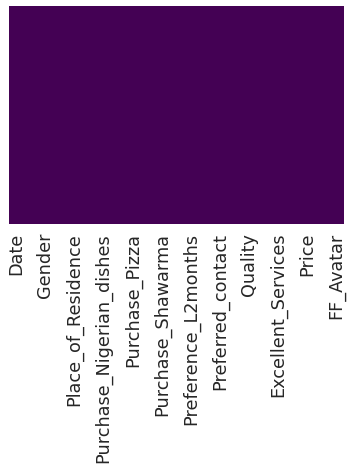

In [ ]:
sns.heatmap(food2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
food_dum = pd.get_dummies(food2.drop(['Personality','FF_Avatar','Date','Favourite_Order','Preferred_contact','Special_Offers', 'Quality',
       'Excellent_Services', 'Convenience', 'Social_MS', 'Preference_L2months', 'FFR_Preference'],axis=1), prefix=['Age', 'Gender', 'Location', 'Frequency', 'Purchase_ND', 'Purchase_B', 'Purchase_P', 'Purchase_SC', 'Purchase_S','Services','Price'], drop_first=True)

# Split Test and Train data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(food_dum, 
                                                    food2['Preferred_contact'], test_size=0.20, 
                                                    random_state=101)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(food_dum, 
                                                    food2['Favourite_Order'], test_size=0.20, 
                                                    random_state=101)

In [ ]:
X_train.shape, X_test.shape,  y_train.shape, y_test.shape


((352, 31), (89, 31), (352,), (89,))

In [ ]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape 

((352, 31), (89, 31), (352,), (89,))

In [ ]:
from collections import Counter
counter = Counter()
counter.update(y_test)
counter

Counter({'Via SMS': 43, 'Via Emails': 46})

In [ ]:
y_train

64        Via SMS
257       Via SMS
118       Via SMS
287    Via Emails
157       Via SMS
          ...    
63     Via Emails
326    Via Emails
337       Via SMS
11     Via Emails
351    Via Emails
Name: Preferred_contact, Length: 352, dtype: object

# Model and Evaluation with Logistic regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [ ]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
min_max_scaler2 = StandardScaler()
X_train2 = min_max_scaler.fit_transform(X_train2)
X_test2 = min_max_scaler.transform(X_test2)

### Training model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
foodmodel = LogisticRegression()
foodmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
foodmodel2 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.3, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=101, 
                                solver='liblinear', max_iter=150, multi_class='ovr', verbose=2, warm_start=False, n_jobs=None, l1_ratio=None)
foodmodel2.fit(X_train2,y_train2)

[LibLinear]

LogisticRegression(C=0.3, max_iter=150, multi_class='ovr', random_state=101,
                   solver='liblinear', verbose=2)

### Predictions

In [ ]:
# Predict y_test 
predictions = foodmodel.predict(X_test)
predictions

array(['Via SMS', 'Via Emails', 'Via Emails', 'Via SMS', 'Via SMS',
       'Via Emails', 'Via Emails', 'Via Emails', 'Via SMS', 'Via Emails',
       'Via Emails', 'Via SMS', 'Via SMS', 'Via Emails', 'Via SMS',
       'Via Emails', 'Via Emails', 'Via SMS', 'Via SMS', 'Via Emails',
       'Via Emails', 'Via SMS', 'Via Emails', 'Via Emails', 'Via Emails',
       'Via Emails', 'Via SMS', 'Via Emails', 'Via Emails', 'Via Emails',
       'Via Emails', 'Via SMS', 'Via Emails', 'Via SMS', 'Via SMS',
       'Via Emails', 'Via SMS', 'Via Emails', 'Via SMS', 'Via SMS',
       'Via Emails', 'Via Emails', 'Via SMS', 'Via Emails', 'Via Emails',
       'Via Emails', 'Via SMS', 'Via SMS', 'Via SMS', 'Via SMS',
       'Via Emails', 'Via SMS', 'Via SMS', 'Via Emails', 'Via Emails',
       'Via Emails', 'Via SMS', 'Via SMS', 'Via SMS', 'Via Emails',
       'Via SMS', 'Via SMS', 'Via SMS', 'Via Emails', 'Via Emails',
       'Via SMS', 'Via Emails', 'Via Emails', 'Via SMS', 'Via Emails',
       'Via SMS', 

In [ ]:
# Predict y_train 
y_train_predict = foodmodel.predict(X_train)

In [ ]:
# Predict y_test2
predictions2 = foodmodel2.predict(X_test2)
predictions2

array(['order_online', 'order_online', 'In_store', 'order_online',
       'Takeaway', 'order_online', 'order_online', 'In_store', 'Takeaway',
       'order_online', 'order_online', 'In_store', 'Takeaway', 'In_store',
       'Takeaway', 'order_online', 'Takeaway', 'Takeaway', 'order_online',
       'In_store', 'Takeaway', 'Takeaway', 'In_store', 'Takeaway',
       'Takeaway', 'Takeaway', 'In_store', 'In_store', 'Takeaway',
       'Takeaway', 'In_store', 'Takeaway', 'In_store', 'order_online',
       'Takeaway', 'In_store', 'In_store', 'In_store', 'Takeaway',
       'Takeaway', 'In_store', 'Takeaway', 'In_store', 'order_online',
       'In_store', 'Takeaway', 'Takeaway', 'Takeaway', 'In_store',
       'Takeaway', 'order_online', 'order_online', 'Takeaway', 'In_store',
       'Takeaway', 'order_online', 'order_online', 'Takeaway', 'In_store',
       'order_online', 'Takeaway', 'order_online', 'order_online',
       'In_store', 'In_store', 'Takeaway', 'In_store', 'In_store',
       'Takeaw

In [ ]:
# Predict y_train2
y_train_predict2 = foodmodel2.predict(X_train2)

### Evaluation

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Get the classification report for logistic regression (y_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

  Via Emails       0.51      0.48      0.49        46
     Via SMS       0.48      0.51      0.49        43

    accuracy                           0.49        89
   macro avg       0.49      0.49      0.49        89
weighted avg       0.50      0.49      0.49        89



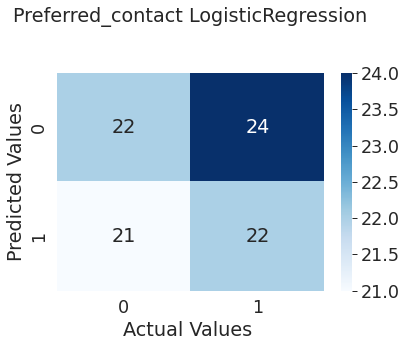

In [ ]:
# Get the confusion matrix for logistic regression (y_test)
ax = sns.heatmap(confusion_matrix(y_test,predictions),annot=True, cmap='Blues')
ax.set_title('Preferred_contact LogisticRegression\n\n');
ax.set_ylabel('Predicted Values')
ax.set_xlabel('Actual Values ');

In [ ]:
# Get the classification report for logistic regression (y_train)
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

  Via Emails       0.62      0.66      0.64       182
     Via SMS       0.61      0.58      0.59       170

    accuracy                           0.62       352
   macro avg       0.62      0.62      0.62       352
weighted avg       0.62      0.62      0.62       352



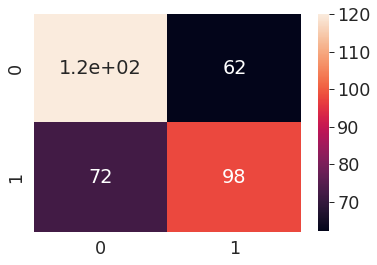

In [ ]:
# Get the confusion matrix for logistic regression (y_train)
cm_train = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm_train, annot=True)

In [ ]:
# visualize actual and predicted result
report2 = {"actual_y": y_test , "predicted_y": predictions}

#display.display(pd.DataFrame(report1))
df = pd.DataFrame(report2)
df

,actual_y,predicted_y
12,Via SMS,Via SMS
19,Via SMS,Via Emails
139,Via SMS,Via Emails
143,Via Emails,Via SMS
155,Via SMS,Via SMS
...,...,...
187,Via SMS,Via SMS
247,Via SMS,Via SMS
51,Via SMS,Via Emails
4,Via Emails,Via Emails


Text(0.5, 1.0, 'predicted_y')

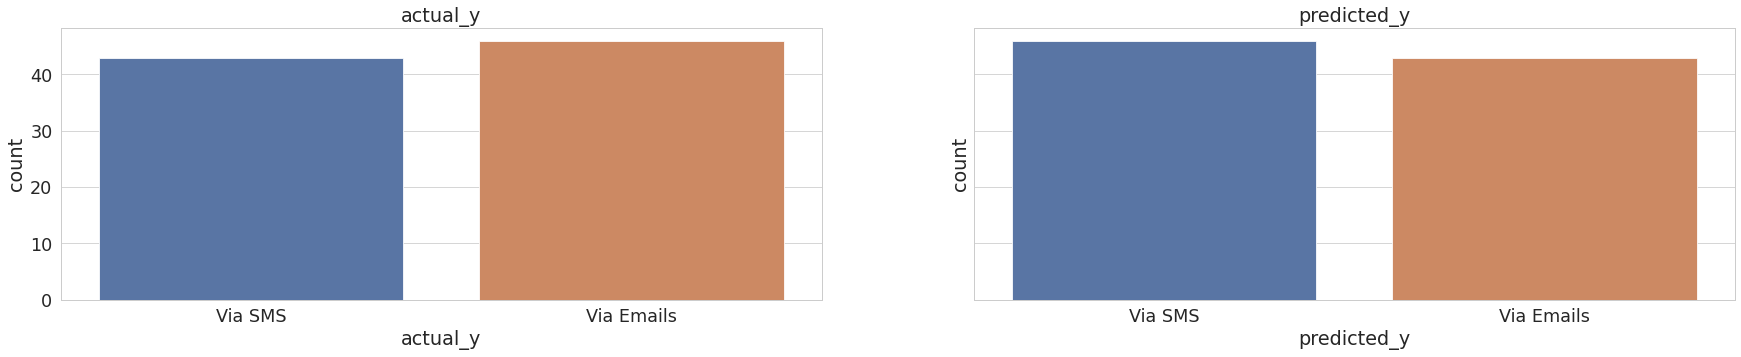

In [ ]:
# visualize actual and predicted result
fig, axes = plt.subplots(1, 2, figsize=(30, 5), sharey=True)


# "actual_y"
sns.countplot(ax=axes[0],data= df,x= "actual_y")
axes[0].set_title(df["actual_y"].name)

# "predicted_y"
sns.countplot(ax=axes[1],data= df,x= "predicted_y")
axes[1].set_title(df["predicted_y"].name)



In [ ]:
# Get the classification report for Model 2 logistic regression (y_test2) 

print(classification_report(y_test2,predictions2))

              precision    recall  f1-score   support

    In_store       0.28      0.23      0.25        31
    Takeaway       0.29      0.34      0.32        35
order_online       0.09      0.09      0.09        23

    accuracy                           0.24        89
   macro avg       0.22      0.22      0.22        89
weighted avg       0.24      0.24      0.23        89



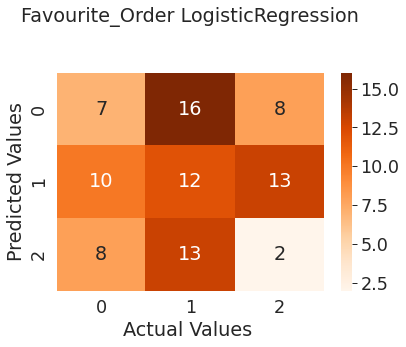

In [ ]:
#Visualise the confusion matrix for Model 2 logistic regression (y_test2) 
ax2 = sns.heatmap(confusion_matrix(y_test2,predictions2),annot=True, cmap='Oranges')
ax2.set_title('Favourite_Order LogisticRegression\n\n');
ax2.set_ylabel('Predicted Values')
ax2.set_xlabel('Actual Values ');

In [ ]:
# Get the classification report for Model 2 logistic regression (y_train2) 
print(classification_report(y_train2, y_train_predict2))

              precision    recall  f1-score   support

    In_store       0.45      0.44      0.45       114
    Takeaway       0.45      0.56      0.50       131
order_online       0.46      0.35      0.40       107

    accuracy                           0.45       352
   macro avg       0.46      0.45      0.45       352
weighted avg       0.46      0.45      0.45       352



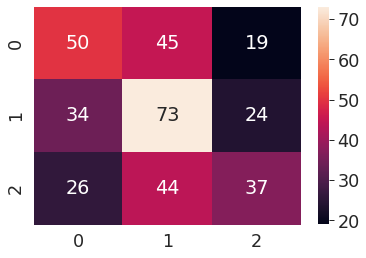

In [ ]:
# Visualise the confusion matrix for Model 2 logistic regression (y_train2) 
cm_train = confusion_matrix(y_train2, y_train_predict2)
sns.heatmap(cm_train, annot=True)

#  Decision tree Model and Evaluation

### Modelling using Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
foodmodel = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=2, min_weight_fraction_leaf=0.0, 
                                   max_features=None, random_state=101, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
foodmodel.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=3,
                       random_state=101)

In [ ]:
foodmodel2 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=2, min_weight_fraction_leaf=0.0, 
                                   max_features='auto', random_state=101, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
foodmodel2.fit(X_train2,y_train2)

DecisionTreeClassifier(max_features='auto', min_samples_leaf=2,
                       random_state=101, splitter='random')

## Predicting

In [ ]:
predictions = foodmodel.predict(X_test)
predictions

array(['Via SMS', 'Via Emails', 'Via Emails', 'Via Emails', 'Via SMS',
       'Via Emails', 'Via Emails', 'Via SMS', 'Via SMS', 'Via SMS',
       'Via SMS', 'Via SMS', 'Via Emails', 'Via Emails', 'Via Emails',
       'Via SMS', 'Via SMS', 'Via Emails', 'Via SMS', 'Via Emails',
       'Via SMS', 'Via Emails', 'Via SMS', 'Via SMS', 'Via SMS',
       'Via Emails', 'Via SMS', 'Via Emails', 'Via Emails', 'Via Emails',
       'Via Emails', 'Via SMS', 'Via SMS', 'Via SMS', 'Via SMS',
       'Via SMS', 'Via Emails', 'Via Emails', 'Via SMS', 'Via SMS',
       'Via SMS', 'Via Emails', 'Via Emails', 'Via Emails', 'Via Emails',
       'Via Emails', 'Via SMS', 'Via Emails', 'Via SMS', 'Via Emails',
       'Via SMS', 'Via Emails', 'Via Emails', 'Via Emails', 'Via Emails',
       'Via Emails', 'Via Emails', 'Via SMS', 'Via SMS', 'Via Emails',
       'Via Emails', 'Via Emails', 'Via Emails', 'Via Emails',
       'Via Emails', 'Via SMS', 'Via Emails', 'Via Emails', 'Via SMS',
       'Via Emails', 'Via 

In [ ]:
y_train_predict = foodmodel.predict(X_train)

In [ ]:
predictions2 = foodmodel2.predict(X_test2)
predictions2

array(['order_online', 'In_store', 'In_store', 'Takeaway', 'Takeaway',
       'In_store', 'In_store', 'In_store', 'In_store', 'Takeaway',
       'Takeaway', 'In_store', 'Takeaway', 'In_store', 'Takeaway',
       'In_store', 'In_store', 'In_store', 'Takeaway', 'In_store',
       'In_store', 'Takeaway', 'In_store', 'Takeaway', 'Takeaway',
       'order_online', 'order_online', 'order_online', 'In_store',
       'order_online', 'Takeaway', 'Takeaway', 'In_store', 'In_store',
       'Takeaway', 'Takeaway', 'In_store', 'Takeaway', 'In_store',
       'Takeaway', 'Takeaway', 'Takeaway', 'In_store', 'order_online',
       'In_store', 'In_store', 'Takeaway', 'In_store', 'In_store',
       'In_store', 'In_store', 'In_store', 'In_store', 'In_store',
       'order_online', 'Takeaway', 'In_store', 'In_store', 'Takeaway',
       'In_store', 'In_store', 'In_store', 'order_online', 'Takeaway',
       'Takeaway', 'Takeaway', 'Takeaway', 'Takeaway', 'order_online',
       'order_online', 'In_store', 'In

In [ ]:
y_train_predict2 = foodmodel.predict(X_train2)

## Evaluate

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
# Get the classification report for Decision tree (y_test) 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

  Via Emails       0.55      0.59      0.57        46
     Via SMS       0.53      0.49      0.51        43

    accuracy                           0.54        89
   macro avg       0.54      0.54      0.54        89
weighted avg       0.54      0.54      0.54        89



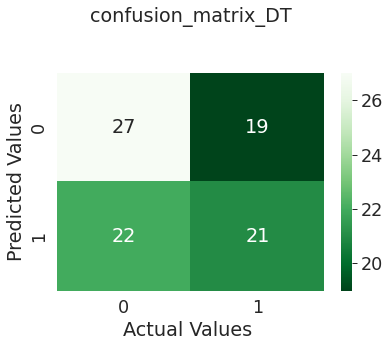

In [ ]:
# Visualise the confusion matrix for Decision tree (y_test) 
ax=sns.heatmap(confusion_matrix(y_test,predictions),annot=True, cmap='Greens_r')
ax.set_title('confusion_matrix_DT\n\n');
ax.set_ylabel('Predicted Values')
ax.set_xlabel('Actual Values ');

In [ ]:
# Get the classification report for Decision Tree (y_train) 
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

  Via Emails       0.83      0.92      0.87       182
     Via SMS       0.91      0.79      0.85       170

    accuracy                           0.86       352
   macro avg       0.87      0.86      0.86       352
weighted avg       0.87      0.86      0.86       352



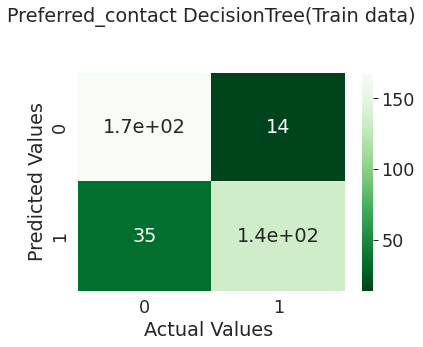

In [ ]:
# Visualize the confusion matrix for decision tree (y_train) 
ax=sns.heatmap(confusion_matrix(y_train, y_train_predict),annot=True, cmap='Greens_r')
ax.set_title('Preferred_contact DecisionTree(Train data)\n\n');
ax.set_ylabel('Predicted Values')
ax.set_xlabel('Actual Values ');

In [ ]:
# Get the classification report for Model 2 Decision tree (y_test2) 
print(classification_report(y_test2,predictions2))

              precision    recall  f1-score   support

    In_store       0.29      0.42      0.34        31
    Takeaway       0.43      0.37      0.40        35
order_online       0.29      0.17      0.22        23

    accuracy                           0.34        89
   macro avg       0.34      0.32      0.32        89
weighted avg       0.34      0.34      0.33        89



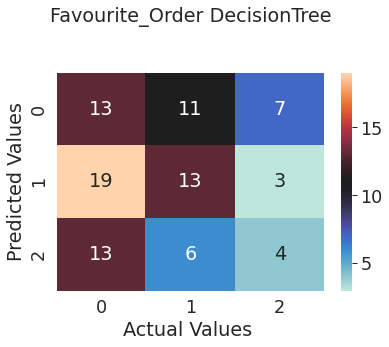

In [ ]:
# visualize the confusion matrix for Model 2 decision tree (y_test2) 
ax=sns.heatmap(confusion_matrix(y_test2,predictions2),annot=True, cmap='icefire')
ax.set_title('Favourite_Order DecisionTree\n\n');
ax.set_ylabel('Predicted Values')
ax.set_xlabel('Actual Values ');

# Model and Evaluate using RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                              max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=101, verbose=0, 
                             warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=10, random_state=101)

In [ ]:
rfc2 = RandomForestClassifier(n_estimators=7, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                              max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=5, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
rfc2.fit(X_train2, y_train2)

RandomForestClassifier(criterion='entropy', max_features='sqrt', n_estimators=7,
                       random_state=5)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
y_train_predict = rfc.predict(X_train)

In [ ]:
rfc_pred2 = rfc2.predict(X_test2)

In [ ]:
# Get the classification report for Random Forest (y_test) 
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

  Via Emails       0.57      0.70      0.63        46
     Via SMS       0.58      0.44      0.50        43

    accuracy                           0.57        89
   macro avg       0.57      0.57      0.56        89
weighted avg       0.57      0.57      0.57        89



In [ ]:
accur=[]
for i in [3,5,7,9,10,11,12,13,14,15,16,17,20,22,24,25,30,35]:
    rfc = RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                              max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=101, verbose=0, 
                             warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    accur.append(accuracy_score(y_test,rfc_pred))
accur

[0.5617977528089888,
 0.5280898876404494,
 0.5056179775280899,
 0.550561797752809,
 0.5730337078651685,
 0.5280898876404494,
 0.5393258426966292,
 0.5280898876404494,
 0.5056179775280899,
 0.47191011235955055,
 0.48314606741573035,
 0.4606741573033708,
 0.48314606741573035,
 0.4606741573033708,
 0.48314606741573035,
 0.4943820224719101,
 0.5168539325842697,
 0.5056179775280899]

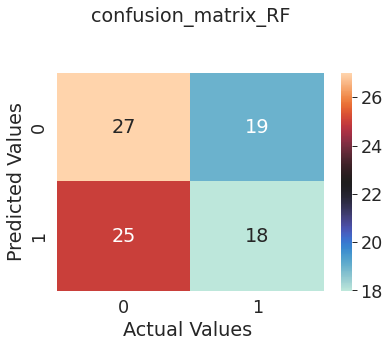

In [ ]:
# Visualize the confusion matrix for Random Forest (y_test) 
ax=sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True, cmap='icefire')
ax.set_title('confusion_matrix_RF\n\n');
ax.set_ylabel('Predicted Values')
ax.set_xlabel('Actual Values ');

In [ ]:
# Get the classification report for Random Forest (y_train) 

print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

  Via Emails       0.97      0.99      0.98       182
     Via SMS       0.99      0.97      0.98       170

    accuracy                           0.98       352
   macro avg       0.98      0.98      0.98       352
weighted avg       0.98      0.98      0.98       352



In [ ]:
# Get the classification report for Random Forest (y_test2) 
print(classification_report(y_test2,rfc_pred2))

              precision    recall  f1-score   support

    In_store       0.31      0.39      0.34        31
    Takeaway       0.36      0.34      0.35        35
order_online       0.35      0.26      0.30        23

    accuracy                           0.34        89
   macro avg       0.34      0.33      0.33        89
weighted avg       0.34      0.34      0.34        89



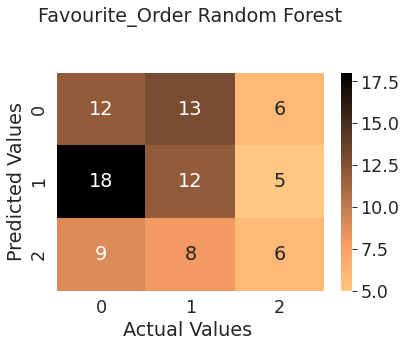

In [ ]:
# Visualize the confusion matrix for Random Forest (y_test2) 
ax=sns.heatmap(confusion_matrix(y_test2,rfc_pred2),annot=True, cmap='copper_r')
ax.set_title('Favourite_Order Random Forest\n\n');
ax.set_ylabel('Predicted Values')
ax.set_xlabel('Actual Values ');

In [ ]:
accur2=[]
for i in [2,3,4,5,6,7,8,9,10]:
    rfc2 = RandomForestClassifier(n_estimators=i)
    rfc2.fit(X_train2, y_train2)
    rfc_pred2 = rfc2.predict(X_test2)
    accur2.append(accuracy_score(y_test2,rfc_pred2))

In [ ]:
accur2

[0.24719101123595505,
 0.30337078651685395,
 0.34831460674157305,
 0.33707865168539325,
 0.3595505617977528,
 0.23595505617977527,
 0.3146067415730337,
 0.33707865168539325,
 0.24719101123595505]

# ❤❤❤❤❤❤❤❤❤❤